## Add Analyst Viewer
Assume these broker coporate ESG for valuation
- Yuanta ESG rating
- Finansia ESG rating

In [ ]:
import pandas as pd
df = pd.read_csv('yuanta_esg_rating.csv', header=None)
print(df.shape)

(165, 22)


In [ ]:
yuanta_esg_rating_df = df.iloc[:, 0:8]

In [ ]:
yuanta_esg_rating_df.columns = ["Stock", "Listed Shares", "Mkt. Cap", "ESG Rating", "Rating", "Target price (THB)", "Last Price", "Upside"]

In [ ]:
yuanta_esg_rating_df = yuanta_esg_rating_df[yuanta_esg_rating_df['Upside']!='n.a.'].sort_values('ESG Rating', ascending=False).reset_index(drop=True)

In [ ]:
yuanta_esg_rating_df.shape

(147, 8)

In [ ]:
(yuanta_esg_rating_df[yuanta_esg_rating_df['Upside']
  .apply(lambda r: r.replace('%', '')).astype('float') > 0]
  .sort_values('ESG Rating', ascending=False)
  .reset_index(drop=True))

,Stock,Listed Shares,Mkt. Cap,ESG Rating,Rating,Target price (THB),Last Price,Upside
0,BEM,15285.00,123044.25,AAA,BUY,9.80,8.05,21.74%
1,KBANK,2369.33,311566.58,AAA,BUY,162.00,131.50,23.19%
2,TRUE,34552.10,207312.60,AAA,BUY,9.70,6.00,61.67%
3,SCGP,4292.92,163130.97,AAA,TRADING,38.25,38.00,0.66%
4,MTW,674.00,1523.24,AAA,BUY,4.50,2.26,99.12%
...,...,...,...,...,...,...,...,...
130,SPA,855.00,10431.00,A,BUY,14.50,12.20,18.85%
131,LPH,720.00,3556.80,A,TRADING,6.30,4.94,27.53%
132,I2,420.00,882.00,A,BUY,3.08,2.10,46.67%
133,VRANDA,319.68,1806.20,A,BUY,6.40,5.65,13.27%


In [ ]:
(yuanta_esg_rating_df[yuanta_esg_rating_df['Upside']
  .apply(lambda r: r.replace('%', '')).astype('float') < 0]
  .sort_values('ESG Rating', ascending=False)
  .reset_index(drop=True))

,Stock,Listed Shares,Mkt. Cap,ESG Rating,Rating,Target price (THB),Last Price,Upside
0,SYNEX,847.36,8643.08,AA,TRADING,10.00,10.20,-1.96%
1,BGC,694.44,5937.50,AA,TRADING,8.20,8.55,-4.09%
2,LPN,1454.20,5671.38,AA,SELL,3.45,3.90,-11.54%
3,KCE,1182.09,62355.17,AA,SELL,47.50,52.75,-9.95%
4,DELTA,12473.82,1047800.56,AA,SELL,55.75,84.00,-33.63%
5,GLOBAL,5001.80,89532.27,AA,TRADING,17.50,17.90,-2.23%
6,TEAMG,817.90,4130.40,AA,SELL,4.10,5.05,-18.81%
7,CBG,1000.00,79750.00,AA,TRADING,78.00,79.75,-2.19%
8,POLY,450.00,3960.00,A,SELL,8.50,8.80,-3.41%
9,HUMAN,867.44,9281.65,A,TRADING,10.40,10.70,-2.80%


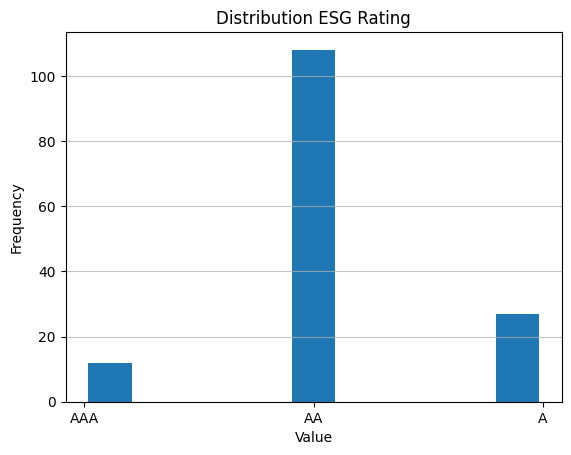

In [ ]:
# Plot the distribution of the column
import matplotlib.pyplot as plt

plt.hist(yuanta_esg_rating_df['ESG Rating'], bins='auto', rwidth=0.85)
plt.title('Distribution ESG Rating')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Remaining
- Filter out high correlation stocks.
- Add portfilio optimization metrics.

## Refinitive ESG Score

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('refinitive-esg-score').get_worksheet(1)

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
# print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows)

# Cleaned dataframe
df['cleaned_symbol'] = df[0].apply(lambda row: row.split('\n'))
df['cleaned_set_esg'] = df[1].apply(lambda row: row.split('\n'))
df['cleaned_refinitiv'] = df[2].apply(lambda row: row.split('\n'))
df = df.drop([0, 1, 2], axis=1)
df.head()

In [ ]:
df['cleaned_symbol'] = df['cleaned_symbol'].apply(lambda row: [r.strip() for r in row if r!=''])
df['cleaned_set_esg'] = df['cleaned_set_esg'].apply(lambda row: [r.strip() for r in row if r!=''])
df['cleaned_refinitiv'] = df['cleaned_refinitiv'].apply(lambda row: [r.strip() for r in row if r!=''])

df_cleaned_symbol = pd.DataFrame(df['cleaned_symbol'][1:].to_list(), columns = df['cleaned_symbol'][0])
df_cleaned_set_esg = pd.DataFrame(df['cleaned_set_esg'][1:].to_list(), columns = df['cleaned_set_esg'][0])
df_cleaned_refinitiv = pd.DataFrame(df['cleaned_refinitiv'][1:].to_list(), columns = df['cleaned_refinitiv'][0])

esg_score_df = pd.concat([df_cleaned_symbol, df_cleaned_set_esg, df_cleaned_refinitiv], axis=1)
esg_score_df['Refinitiv ESG'] = esg_score_df['Refinitiv ESG'].astype('float')
esg_score_df['E'] = esg_score_df['E'].astype('float')
esg_score_df['S'] = esg_score_df['S'].astype('float')
esg_score_df['G'] = esg_score_df['G'].astype('float')

In [ ]:
esg_score_df.dtypes

In [ ]:
# esg_score_df.to_csv('refinitive_esg_score_cleaned.csv', index=False)

In [ ]:
esg_score_df.sort_values(by='Refinitiv ESG', ascending=False).head(10)

,Symbol,Company,Industry / Sector,SET ESG Ratings,Refinitiv ESG,Rank,E,S,G
82,MINT,บริษัท ไมเนอร์ อินเตอร์เนชั่นแนล จำกัด (มหาชน),SERVICE/TOURISM,AA,91.31,1 / 168,96.92,88.32,90.74
44,DELTA,บริษัทเดลต้า อีเลคโทรนิคส์ (ประเทศไทย) จำกัด (...,TECH/ETRON,-,87.93,2 / 168,86.35,86.67,91.49
114,SCC,บริษัท ปูนซิเมนต์ไทย จำกัด(มหาชน),PROPCON/CONMAT,AAA,83.28,5 / 168,89.95,82.46,74.84
13,BANPU,บริษัท บ้านปู จำกัด (มหาชน),RESOURC/ENERG,AAA,82.54,4 / 168,90.94,86.32,67.58
34,CIMBT,ธนาคาร ซีไอเอ็มบี ไทย จำกัด (มหาชน),FINCIAL/BANK,-,82.50,7 / 168,80.14,83.44,82.14
129,STGT,บริษัท ศรีตรังโกลฟส์ (ประเทศไทย) จำกัด (มหาชน),CONSUMP/PERSON,AAA,82.23,3 / 168,72.20,86.08,81.85
100,PTT,บริษัท ปตท. จำกัด (มหาชน),RESOURC/ENERG,AAA,81.70,10 / 168,91.40,90.95,50.99
28,BTS,บริษัท บีทีเอส กรุ๊ป โฮลดิ้งส์ จำกัด (มหาชน),SERVICE/TRANS,AA,81.64,6 / 168,63.21,94.93,82.35
65,IRPC,บริษัท ไออาร์พีซี จำกัด (มหาชน),RESOURC/ENERG,AA,81.01,9 / 168,84.10,81.31,75.93
17,BCP,บริษัท บางจาก คอร์ปอเรชั่น จำกัด (มหาชน),RESOURC/ENERG,AAA,80.37,8 / 168,90.68,90.01,48.05


In [ ]:
selected_stock_list = esg_score_df.sort_values(by='Refinitiv ESG', ascending=False).head(10)['Symbol'].to_list()

In [ ]:
stock_list = [stock + '.BK' for stock in selected_stock_list]

In [ ]:
# esg_score_df.to_pickle('esg_score.pkl')

## ThaiBMA ESG Bond

In [ ]:
esg_stock_list = esg_score_df.sort_values(by='Refinitiv ESG', ascending=False)['Symbol'].to_list()

In [ ]:
from typing import Union

def adjust_risk_for_invest(age: int) -> Union[int, int]:
  """Adjust asset allocation by age.
  https://www.setinvestnow.com/th/knowledge/article/46-porfolio-management-by-age
  Args:
    age (int):
  Return:
    pct_esg_stock (int)
    pct_esg_bond_cash (int):
  """
  if age>=21 and age<30:
    pct_esg_stock, pct_esg_bond_cash = 90, 10
  elif age>=31 and age<40:
    pct_esg_stock, pct_esg_bond_cash = 50, 50
  elif age>41 and age<55:
    pct_esg_stock, pct_esg_bond_cash = 30, 70
  elif age>=55:
    pct_esg_stock, pct_esg_bond_cash = 10, 90
  return pct_esg_stock, pct_esg_bond_cash

In [ ]:
# Choose top bonds > equal weighted 10 (ESG Bonds + Cash)
# - Green
# - Social
# - Sustainability
# - Sustainability-linked

def preprocess_bond_df(file_name: str):
  import re

  bond_df = pd.read_excel(file_name)
  bond_df = bond_df[['Issuer Name', 'ThaiBMA Symbol', 'Rating', 'TTM(Yrs.)', 'Coupon (%)', 'Currency']]
  bond_df = bond_df[bond_df['Currency']=='THB'].dropna(subset=['Rating']).reset_index(drop=True)
  bond_df['Symbol'] = bond_df['ThaiBMA Symbol'].apply(lambda row: re.split(r'\d+', row)[0])

  # Check ESG Index
  bond_df['is_esg'] = bond_df['Symbol'].apply(lambda row: row in esg_stock_list)
  bond_df = bond_df[bond_df['is_esg'] == True]
  bond_df['credit_rating'] = bond_df['Rating'].apply(lambda row: row.split('/')[0])

  return bond_df

In [ ]:
sustain_bond_df = preprocess_bond_df('sustain_rg.xlsx')   # Sustainability
sustain_bond_df['Bond Type'] = 'Sustainability'
green_bond_df = preprocess_bond_df('green_rg.xlsx')       # Green
green_bond_df['Bond Type'] = 'Green'
social_bond_df = preprocess_bond_df('social_rg.xlsx')     # Social
social_bond_df['Bond Type'] = 'Social'
sustain_link_bond_df = preprocess_bond_df('slb_rg.xlsx')  # Sustainability-linked
sustain_link_bond_df['Bond Type'] = 'Sustainability-linked'

In [ ]:
esg_bond_df = pd.concat([sustain_bond_df, green_bond_df, social_bond_df, sustain_link_bond_df], ignore_index=True)
esg_bond_df['credit_rating'] = esg_bond_df['credit_rating'].apply(lambda row: row.replace('(tha)', ''))

In [ ]:
esg_bond_df = esg_bond_df.merge(esg_score_df[['Symbol', 'Refinitiv ESG']], on='Symbol', how='left')
esg_bond_df.head()

,Issuer Name,ThaiBMA Symbol,Rating,TTM(Yrs.),Coupon (%),Currency,Symbol,is_esg,credit_rating,Bond Type,Refinitiv ESG
0,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM244A,A-/TRIS,0.449315,1.56,THB,BEM,True,A-,Sustainability,41.27
1,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM264A,A-/TRIS,2.449315,2.24,THB,BEM,True,A-,Sustainability,41.27
2,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM284A,A-/TRIS,4.452055,2.91,THB,BEM,True,A-,Sustainability,41.27
3,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM314A,A-/TRIS,7.452055,3.33,THB,BEM,True,A-,Sustainability,41.27
4,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM259A,A-/TRIS,1.805479,2.76,THB,BEM,True,A-,Sustainability,41.27


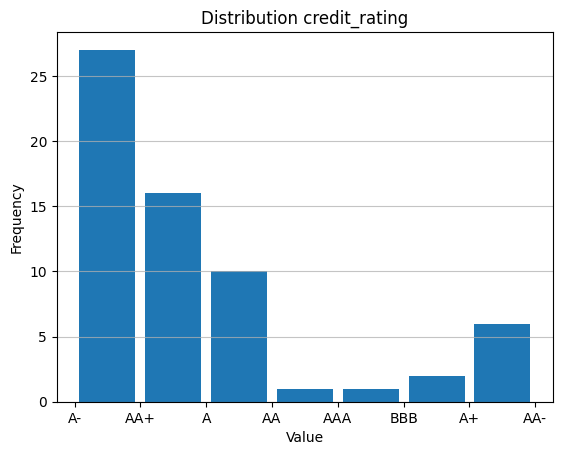

In [ ]:
# Plot the distribution of the column
import matplotlib.pyplot as plt

plt.hist(esg_bond_df['credit_rating'], bins='auto', rwidth=0.85)
plt.title('Distribution credit_rating')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# Summarize ESG bonds
selected_esg_bond_df = esg_bond_df.groupby(['Bond Type', 'Symbol'])['Symbol'].count().sort_values(ascending=False)
selected_esg_bond_df = pd.DataFrame({'Bond Type-Symbol': selected_esg_bond_df.index.to_list(), '#ESG bonds' :selected_esg_bond_df.to_list()})
selected_esg_bond_df['Bond Type'] = selected_esg_bond_df['Bond Type-Symbol'].apply(lambda row: row[0])
selected_esg_bond_df['Symbol'] = selected_esg_bond_df['Bond Type-Symbol'].apply(lambda row: row[1])
selected_esg_bond_df = selected_esg_bond_df.drop('Bond Type-Symbol', axis=1)
selected_esg_bond_df = selected_esg_bond_df[['Bond Type', 'Symbol', '#ESG bonds']].merge(esg_score_df[['Symbol', 'Refinitiv ESG']], on='Symbol', how='left')
selected_esg_bond_df.sort_values(by=['Refinitiv ESG', '#ESG bonds'], ascending=False).reset_index(drop=True)

,Bond Type,Symbol,#ESG bonds,Refinitiv ESG
0,Green,STGT,3,82.23
1,Green,IRPC,1,81.01
2,Sustainability-linked,WHA,2,71.92
3,Green,CPN,1,69.98
4,Sustainability-linked,TU,3,69.08
5,Green,RATCH,3,64.74
6,Green,BGRIM,3,63.26
7,Green,EGCO,5,63.25
8,Green,WHAUP,2,60.69
9,Green,GPSC,8,59.46


In [ ]:
def get_bond_unit_price(thai_bma_code: str) -> float:
  """
  [on-going] Update bond info. using SEC Open API:
  - 02.ชื่อตราสารหนี้
  - 04.ประเภทและอัตราดอกเบี้ยหรือผลตอบแทน
  - 06.จำนวนและมูลค่าที่เสนอขาย (ราคาหน่วยลงทุน)
  - 07. การจัดอันดับความน่าเชื่อถือของตราสาร
  """
  import requests
  import json

  headers = {'Ocp-Apim-Subscription-Key': '401457b21f2b48c49a16d14289f3ddf7'}
  json = {"SecurityCode": thai_bma_code}

  # To get issued_ref_id
  response = requests.post(
    url=f'https://api.sec.or.th/bond/outstanding/issue',
    json=json,
    headers=headers
  )
  issued_ref_id = response.json()[0]['issued_ref_id']

  # To calculate unit price
  response = requests.get(
    url=f'https://api.sec.or.th/bond/outstanding/{issued_ref_id}/offering_unit',
    headers=headers
  )
  price_info = response.json()[0]
  unit_price = float(price_info['total_value'])/float(price_info['total_unit'])
  return unit_price

In [ ]:
# esg_bond_df['unit price'] = esg_bond_df['ThaiBMA Symbol'].apply(lambda row: get_bond_unit_price(row))

In [ ]:
esg_bond_df.head()

,Issuer Name,ThaiBMA Symbol,Rating,TTM(Yrs.),Coupon (%),Currency,Symbol,is_esg,credit_rating,Bond Type,Refinitiv ESG
0,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM244A,A-/TRIS,0.449315,1.56,THB,BEM,True,A-,Sustainability,41.27
1,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM264A,A-/TRIS,2.449315,2.24,THB,BEM,True,A-,Sustainability,41.27
2,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM284A,A-/TRIS,4.452055,2.91,THB,BEM,True,A-,Sustainability,41.27
3,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM314A,A-/TRIS,7.452055,3.33,THB,BEM,True,A-,Sustainability,41.27
4,BANGKOK EXPRESSWAY AND METRO PUBLIC COMPANY LI...,BEM259A,A-/TRIS,1.805479,2.76,THB,BEM,True,A-,Sustainability,41.27


In [ ]:
# esg_bond_df.to_pickle('esg_bond.pkl')

## Black-Litterman Model
https://github.com/robertmartin8/PyPortfolioOpt/blob/master/cookbook/4-Black-Litterman-Allocation.ipynb
https://pyportfolioopt.readthedocs.io/en/latest/BlackLitterman.html

### Data Preparation

In [ ]:
!pip install PyPortfolioOpt
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
import requests
import pandas as pd

def get_stats(ticker, dict_result=False, headers = {'User-agent': 'Mozilla/5.0'}):
  """Scrapes information from the statistics tab on Yahoo Finance
  https://finance.yahoo.com/quote/
  Args:
    ticker (str):
    dict_result (bool):
  Return:
    table_stats_df (dataframe):
    table_stats_dict (dict):
  """
  stats_site = f"https://finance.yahoo.com/quote/{ticker}/key-statistics?p={ticker}"

  tables = pd.read_html(requests.get(stats_site, headers=headers).text)
  tables = [table for table in tables[1:] if table.shape[1] == 2]

  table_stats = pd.concat(tables)
  table_stats.columns = ["attribute" , "value"]
  table_stats_df = table_stats.reset_index(drop = True)

  if dict_result:
    table_stats_dict = {key : val for key,val in zip(table_stats.attribute , table_stats.value)}
    return table_stats_dict

  return table_stats_df

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# All esg stock list
# tickers = esg_score_df['Symbol'].apply(lambda row: row + '.BK').to_list()

In [ ]:
tickers = [
  'MINT.BK',
  'DELTA.BK',
  'SCC.BK',
  'CIMBT.BK',
  'BANPU.BK',
  'STGT.BK',
  'BTS.BK',
  'PTT.BK',
  'IRPC.BK',
  'BCP.BK'
]

In [ ]:
ohlc = yf.download(tickers, period="1y")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%%**********************]  10 of 10 completed


,BANPU.BK,BCP.BK,BTS.BK,CIMBT.BK,DELTA.BK,IRPC.BK,MINT.BK,PTT.BK,SCC.BK,STGT.BK
Date,,,,,,,,,,
2023-11-17,8.10,42.75,7.35,0.61,81.25,2.04,27.5,34.25,291.0,6.25
2023-11-20,8.00,44.25,7.20,0.59,82.50,2.08,28.0,34.50,289.0,6.60
2023-11-21,8.00,44.00,7.15,0.61,84.00,2.08,28.0,34.75,294.0,6.60
2023-11-22,7.85,44.50,7.20,0.61,81.00,2.06,28.0,34.75,295.0,6.55
2023-11-23,7.85,44.50,7.20,0.61,80.25,2.04,28.0,34.25,294.0,6.50


In [ ]:
# Pick uncorrelated stock for portfolio (correlation < 0.7)
# To diversify your portfolio to reduce risk
prices_corr_df = prices.corr()
prices_corr_df

,BANPU.BK,BCP.BK,BTS.BK,CIMBT.BK,DELTA.BK,IRPC.BK,MINT.BK,PTT.BK,SCC.BK,STGT.BK
BANPU.BK,1.000000,-0.606473,0.699705,0.723926,-0.409895,0.899567,0.105074,-0.388460,0.652995,0.673038
BCP.BK,-0.606473,1.000000,-0.242082,-0.805534,0.277327,-0.634081,-0.350179,0.821962,-0.604340,-0.817260
BTS.BK,0.699705,-0.242082,1.000000,0.504080,-0.433854,0.705862,0.125877,-0.110270,0.609514,0.445957
CIMBT.BK,0.723926,-0.805534,0.504080,1.000000,-0.030342,0.866957,0.616823,-0.623005,0.850813,0.921124
DELTA.BK,-0.409895,0.277327,-0.433854,-0.030342,1.000000,-0.237979,0.480136,0.297515,-0.080054,-0.137078
IRPC.BK,0.899567,-0.634081,0.705862,0.866957,-0.237979,1.000000,0.341523,-0.430363,0.791534,0.848103
MINT.BK,0.105074,-0.350179,0.125877,0.616823,0.480136,0.341523,1.000000,-0.220127,0.662371,0.457091
PTT.BK,-0.388460,0.821962,-0.110270,-0.623005,0.297515,-0.430363,-0.220127,1.000000,-0.379253,-0.733502
SCC.BK,0.652995,-0.604340,0.609514,0.850813,-0.080054,0.791534,0.662371,-0.379253,1.000000,0.731520
STGT.BK,0.673038,-0.817260,0.445957,0.921124,-0.137078,0.848103,0.457091,-0.733502,0.731520,1.000000


In [ ]:
prices_corr_df[prices_corr_df < 0.7]

,BANPU.BK,BCP.BK,BTS.BK,CIMBT.BK,DELTA.BK,IRPC.BK,MINT.BK,PTT.BK,SCC.BK,STGT.BK
BANPU.BK,NaN,-0.606473,0.699705,NaN,-0.409895,NaN,0.105074,-0.388460,0.652995,0.673038
BCP.BK,-0.606473,NaN,-0.242082,-0.805534,0.277327,-0.634081,-0.350179,NaN,-0.604340,-0.817260
BTS.BK,0.699705,-0.242082,NaN,0.504080,-0.433854,NaN,0.125877,-0.110270,0.609514,0.445957
CIMBT.BK,NaN,-0.805534,0.504080,NaN,-0.030342,NaN,0.616823,-0.623005,NaN,NaN
DELTA.BK,-0.409895,0.277327,-0.433854,-0.030342,NaN,-0.237979,0.480136,0.297515,-0.080054,-0.137078
IRPC.BK,NaN,-0.634081,NaN,NaN,-0.237979,NaN,0.341523,-0.430363,NaN,NaN
MINT.BK,0.105074,-0.350179,0.125877,0.616823,0.480136,0.341523,NaN,-0.220127,0.662371,0.457091
PTT.BK,-0.388460,NaN,-0.110270,-0.623005,0.297515,-0.430363,-0.220127,NaN,-0.379253,-0.733502
SCC.BK,0.652995,-0.604340,0.609514,NaN,-0.080054,NaN,0.662371,-0.379253,NaN,NaN
STGT.BK,0.673038,-0.817260,0.445957,NaN,-0.137078,NaN,0.457091,-0.733502,NaN,NaN


In [ ]:
market_prices = yf.download("^SET.BK", period="1y")["Adj Close"]
market_prices.head()

[*********************100%%**********************]  1 of 1 completed


Date
2022-11-23    1624.400024
2022-11-24    1624.959961
2022-11-25    1620.839966
2022-11-28    1616.910034
2022-11-29    1624.390015
Name: Adj Close, dtype: float64

In [ ]:
# cache data
# prices.to_pickle('all_prices.pkl')
# market_prices.to_pickle('market_prices.pkl')

In [ ]:
from pprint import pprint


# mcaps = {}
# betas = {}
# payouts = {}
financial_info_dict = {
  'Symbol': [],
  'Marketcap': [],
  'Beta (5Y Monthly)': [],
  'Payout Ratio 4': []
}

# Workaround solution to financial number.
# betas = {'BANPU.BK': 1.00,
#  'BCP.BK': 1.14,
#  'BTS.BK': 0.52,
#  'CIMBT.BK': 0.40,
#  'DELTA.BK': 2.06,
#  'IRPC.BK': 1.02,
#  'MINT.BK': 1.13,
#  'PTT.BK': 0.78,
#  'SCC.BK': 0.44,
#  'STGT.BK': 0.20}
# payouts = {'BANPU.BK': 238.33/100,
#  'BCP.BK': 14.51/100,
#  'BTS.BK': 794.87/100,
#  'CIMBT.BK': 19.17/100,
#  'DELTA.BK': 27.78/100,
#  'IRPC.BK': 72.00/100,
#  'MINT.BK': 58.82/100,
#  'PTT.BK': 43.86/100,
#  'SCC.BK': 19.85/100,
#  'STGT.BK': 416.67/100}


for t in tickers:
  stock = yf.Ticker(t)

  # workaround solution
  # mcaps[t] = stock.fast_info["marketCap"]
  # stock_info = get_stats(t, dict_result=True)
  # betas[t] =  float(stock_info["Beta (5Y Monthly)"])
  # payouts[t] = float(stock_info["Payout Ratio 4"].replace(',', '').replace('%', ''))/100

  financial_info_dict['Symbol'].append(t)
  financial_info_dict['Marketcap'].append(stock.fast_info["marketCap"])
  stock_info = get_stats(t, dict_result=True)
  financial_info_dict['Beta (5Y Monthly)'].append(float(stock_info["Beta (5Y Monthly)"]))
  financial_info_dict['Payout Ratio 4'].append(float(stock_info["Payout Ratio 4"].replace(',', '').replace('%', ''))/100)


  # mcaps[t] = stock.info["marketCap"]
  # betas[t] = stock.info["beta"]
  # payouts[t] = stock.info["payoutRatio"]

  # additional data
  # additional_data[t] = (stock.info["trailingPE"], stock.info["forwardPE"])
  # dividend[t] = stock.info["dividendYield"]

# print("Market Cap")
# pprint(mcaps)

# print("Beta (5Y Monthly)")
# pprint(betas)

# print("PayoutRatio")
# pprint(payouts)

In [ ]:
financial_info_df = pd.DataFrame(financial_info_dict, columns=['Symbol', 'Marketcap', 'Beta (5Y Monthly)', 'Payout Ratio 4'])

In [ ]:
# financial_info_df.to_pickle('financial_info.pkl')

In [ ]:
selected_stock_list = ['MINT', 'DELTA', 'SCC', 'BANPU', 'CIMBT', 'STGT', 'PTT', 'BTS', 'IRPC', 'BCP', 'AOT']

In [ ]:
# Initial read pickle file
esg_score_df = pd.read_pickle('esg_score.pkl')
esg_score_df = esg_score_df.sort_values(by='Refinitiv ESG', ascending=False)
all_prices = pd.read_pickle('all_prices.pkl')
market_prices = pd.read_pickle('market_prices.pkl')
financial_info_df = pd.read_pickle('financial_info.pkl')
esg_bond_df = pd.read_pickle('esg_bond.pkl')  # ESG bonds

In [ ]:
# Constructing input
input_stock = [s + '.BK' for s in selected_stock_list]

_financial_info = financial_info_df[financial_info_df['Symbol'].isin(input_stock)]
prices = all_prices[input_stock]
mcaps = _financial_info.set_index('Symbol')['Marketcap'].to_dict()
betas = _financial_info['Beta (5Y Monthly)']
payouts = _financial_info['Payout Ratio 4']

In [ ]:
# not_valuation = financial_info_df[financial_info_df['Payout Ratio 4'] == 0.0]['Symbol'].to_list()
# not_valuation

['AAV.BK',
 'ACE.BK',
 'AOT.BK',
 'BWG.BK',
 'CENTEL.BK',
 'CFRESH.BK',
 'ERW.BK',
 'JAS.BK',
 'KEX.BK',
 'PPP.BK',
 'STARK.BK',
 'SUPER.BK',
 'SYNTEC.BK',
 'THAI.BK']

In [ ]:
# not_valuation = financial_info_df[financial_info_df['Payout Ratio 4'] == 0.0]['Symbol'].to_list()
# financial_info_df[~financial_info_df['Symbol'].isin(not_valuation)].reset_index(drop=True)

,Symbol,Marketcap,Beta (5Y Monthly),Payout Ratio 4
2,ADVANC.BK,6.483320e+11,0.05,0.8315
3,AEONTS.BK,3.975000e+10,0.66,0.4221
4,AH.BK,1.029042e+10,1.09,0.3126
5,AMATA.BK,3.032332e+10,0.92,0.3757
6,AMATAV.BK,5.142500e+09,0.50,3.5000
...,...,...,...,...
163,UAC.BK,2.617016e+09,0.23,0.6383
164,VGI.BK,2.350845e+10,0.95,3.3333
165,WHA.BK,7.533943e+10,0.55,0.5150
166,WHAUP.BK,1.530000e+10,0.17,0.4324


In [ ]:
# Constructing the prior
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
import pypfopt

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

-11.910044955181169

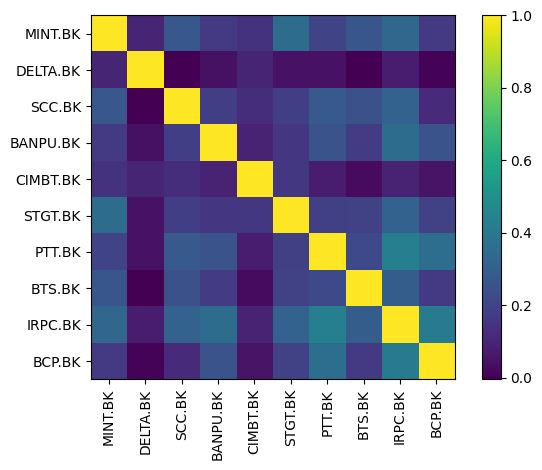

In [ ]:
plotting.plot_covariance(S, plot_correlation=True);

In [ ]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

MINT.BK    -0.159564
DELTA.BK   -1.707511
SCC.BK     -0.090056
BANPU.BK   -0.123765
CIMBT.BK   -0.074581
STGT.BK    -0.153007
PTT.BK     -0.196993
BTS.BK     -0.086299
IRPC.BK    -0.190661
BCP.BK     -0.141931
dtype: float64

<Axes: >

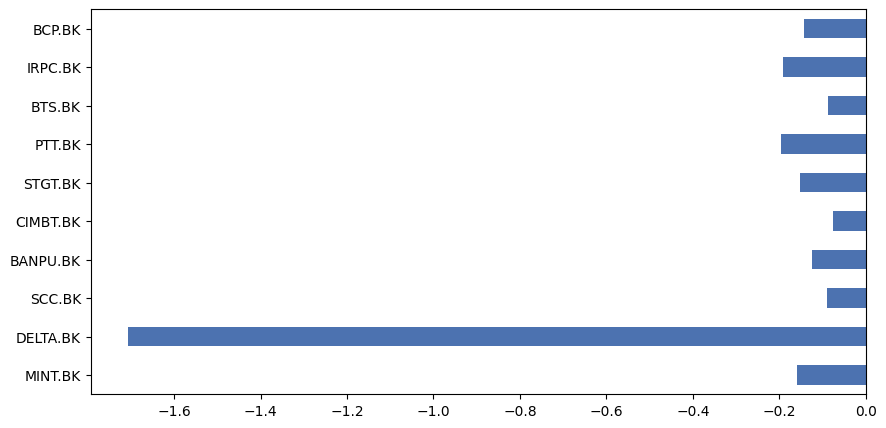

In [ ]:
market_prior.plot.barh(figsize=(10,5))

### Initial Views as ESG Score

In [ ]:
def spice_model_mapper(esg_score: float, beta: float) -> float:
  """Calulate Views (Adjust Beta using ESG Score with SPICE Model)
  Args:
    esg_score (float):
    beta (float):
  Return:
    beta_adjustment (float):
  """
  if esg_score>=85:                     # -20%
    adjust_beta = beta - (beta*0.2)
  elif esg_score>=80 and esg_score<85:  # -10%
    adjust_beta = beta - (beta*0.1)
  elif esg_score>=75 and esg_score<80:  # 0%
    adjust_beta = beta
  elif esg_score>=70 and esg_score<75:  # +10%
    adjust_beta = beta + (beta*0.1)
  elif esg_score<70:                    # +20%
    adjust_beta = beta + (beta*0.2)
  return adjust_beta

In [ ]:
selected_column_list = ['Symbol', 'Refinitiv ESG']
# spice_model_df = esg_score_df.sort_values(by='Refinitiv ESG', ascending=False)[selected_column_list].head(10).reset_index(drop=True)
spice_model_df = esg_score_df[esg_score_df['Symbol'].isin(selected_stock_list)][['Symbol', 'Refinitiv ESG']].reset_index(drop=True)
spice_model_df['Symbol'] = spice_model_df['Symbol'].apply(lambda row: row+'.BK')
# spice_model_df['Beta'] = pd.Series(betas).to_list()
spice_model_df['Beta'] = betas.to_list()  # Revised version
spice_model_df['Adjusted Beta'] = spice_model_df.apply(lambda row: spice_model_mapper(row['Refinitiv ESG'], row['Beta']), axis=1)

# SET Performance
market_price_1 = market_prices.head(1)[0]   # 2022-10-26
market_price_2 = market_prices.tail(1)[0]   # 2023-10-26
market_performance = (market_price_2 - market_price_1)/market_price_1
spice_model_df['Market Return 1YR'] = market_performance # P.Job request
# Test Convert market_risk_premium=-14%

# Construct views (base version)
spice_model_df['New Expected Return'] = spice_model_df['Adjusted Beta'] * spice_model_df['Market Return 1YR']


# Construct views (new version)
# expected_return = risk_free_rate + (beta * market_risk_premium)
risk_free_rate = 0.012
# market_risk_premium = 0.08-risk_free_rate
market_risk_premium = market_performance-risk_free_rate

# Implied PER (Payout Ratio)/(Ke-g) as Valuation Model
# spice_model_df['payoutRatio'] = pd.Series(payouts).to_list()
spice_model_df['payoutRatio'] = payouts.to_list()  # Revised version
spice_model_df['Base PER'] = spice_model_df['payoutRatio']/((risk_free_rate + (spice_model_df['Beta'] * market_risk_premium))-0.03)
spice_model_df['New PER'] = spice_model_df['payoutRatio']/((risk_free_rate + (spice_model_df['Adjusted Beta'] * market_risk_premium))-0.03)

In [ ]:
# Calculate premium as view
spice_model_df['premium'] = (spice_model_df['New PER']-spice_model_df['Base PER'])/spice_model_df['Base PER']
spice_model_df["premium"] = spice_model_df["premium"].apply(lambda row: abs(row))

In [ ]:
# dynamic market_risk_premium
spice_model_df

,Symbol,Refinitiv ESG,Beta,Adjusted Beta,Market Return 1YR,New Expected Return,payoutRatio,Base PER,New PER,premium
0,MINT.BK,91.31,1.00,0.800,-0.134074,-0.107259,2.3833,-14.525750,-17.672491,0.216632
1,DELTA.BK,87.93,1.14,0.912,-0.134074,-0.122276,0.1451,-0.786345,-0.959532,0.220242
2,SCC.BK,83.28,0.52,0.468,-0.134074,-0.062747,13.4783,-143.449420,-156.066221,0.087953
3,BANPU.BK,82.54,0.40,0.360,-0.134074,-0.048267,0.2300,-3.009303,-3.258405,0.082777
4,CIMBT.BK,82.50,2.06,1.854,-0.134074,-0.248573,0.2778,-0.871085,-0.961840,0.104186
5,STGT.BK,82.23,1.02,0.918,-0.134074,-0.123080,0.7200,-4.311490,-4.733850,0.097962
6,PTT.BK,81.70,1.13,1.017,-0.134074,-0.136353,0.5882,-3.213088,-3.531515,0.099103
7,BTS.BK,81.64,0.78,0.702,-0.134074,-0.094120,0.4386,-3.324293,-3.638504,0.094520
8,IRPC.BK,81.01,0.44,0.396,-0.134074,-0.053093,0.1985,-2.412710,-2.617167,0.084742
9,BCP.BK,80.37,0.20,0.180,-0.134074,-0.024133,4.1667,-88.249818,-94.070564,0.065958


In [ ]:
viewdict = {row['Symbol']: row['premium'] for row in spice_model_df[['Symbol', 'premium']].to_dict('records')}

In [ ]:
# Views incoporated with ESG score
pprint(viewdict)

{'AOT.BK': 0.11012454960372005,
 'BANPU.BK': 0.08795296484044848,
 'BCP.BK': 0.08474166679784513,
 'BTS.BK': 0.0991032389025605,
 'CIMBT.BK': 0.08277715790757635,
 'DELTA.BK': 0.21663189298765875,
 'IRPC.BK': 0.09451966556207005,
 'MINT.BK': nan,
 'PTT.BK': 0.09796152674611266,
 'SCC.BK': 0.09919727692029967,
 'STGT.BK': 0.10418641788081005}


### BLM witout ESG

In [ ]:
# # Views
# viewdict = {
#   "BANPU.BK": 0.1,
#   "BCP.BK": 0.1,
#   "BTS.BK": 0.1,
#   "CIMBT.BK": 0.1,
#   "DELTA.BK": 0.1,
#   "IRPC.BK": 0.1,
#   "MINT.BK": 0.1,
#   "PTT.BK": 0.1,
#   "SCC.BK": 0.1,
#   "STGT.BK": 0.1
# }

# # confidences = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,0.7]
# # bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

# bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

# # Posterior estimate of returns
# ret_bl = bl.bl_returns()
# ret_bl

# rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
#              index=["Prior", "Posterior", "Views"]).T
# rets_df

# bl.bl_weights()

# rets_df.plot.bar(figsize=(6,4));

# S_bl = bl.bl_cov()
# plotting.plot_covariance(S_bl);

### BLM with ESG

In [ ]:
pprint(viewdict)
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, absolute_views=viewdict)

# Posterior estimate of returns
ret_bl = bl.bl_returns()
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

{'AOT.BK': 0.11012454960372005,
 'BANPU.BK': 0.08795296484044848,
 'BCP.BK': 0.08474166679784513,
 'BTS.BK': 0.0991032389025605,
 'CIMBT.BK': 0.08277715790757635,
 'DELTA.BK': 0.21663189298765875,
 'IRPC.BK': 0.09451966556207005,
 'MINT.BK': nan,
 'PTT.BK': 0.09796152674611266,
 'SCC.BK': 0.09919727692029967,
 'STGT.BK': 0.10418641788081005}


,Prior,Posterior,Views
MINT.BK,-0.146242,NaN,NaN
DELTA.BK,-1.310357,NaN,0.216632
SCC.BK,-0.081420,NaN,0.099197
BANPU.BK,-0.117621,NaN,0.087953
CIMBT.BK,-0.059894,NaN,0.082777
STGT.BK,-0.147302,NaN,0.104186
PTT.BK,-0.166011,NaN,0.097962
BTS.BK,-0.096411,NaN,0.099103
IRPC.BK,-0.171570,NaN,0.094520
BCP.BK,-0.124934,NaN,0.084742


In [ ]:
bl.bl_weights()

OrderedDict([('MINT.BK', nan),
             ('DELTA.BK', nan),
             ('SCC.BK', nan),
             ('BANPU.BK', nan),
             ('CIMBT.BK', nan),
             ('STGT.BK', nan),
             ('PTT.BK', nan),
             ('BTS.BK', nan),
             ('IRPC.BK', nan),
             ('BCP.BK', nan),
             ('AOT.BK', nan)])

<Axes: >

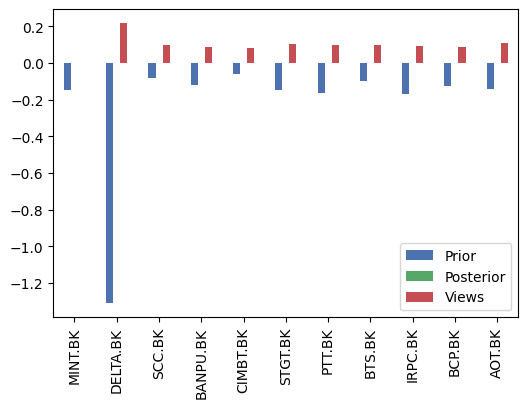

In [ ]:
rets_df.plot.bar(figsize=(6,4))

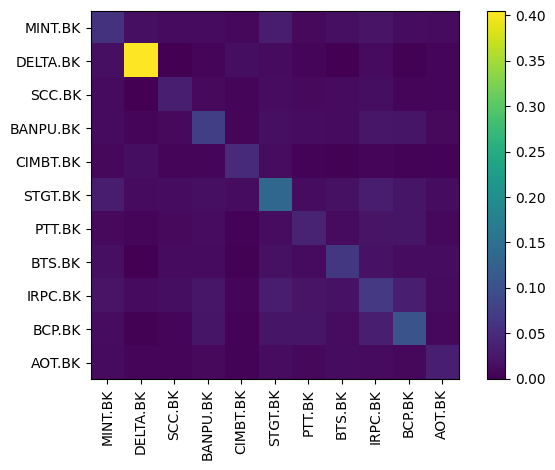

In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

## Portfolio allocation without ESG

In [ ]:
# from pypfopt import EfficientFrontier, objective_functions

# ef = EfficientFrontier(ret_bl, S_bl)
# ef.add_objective(objective_functions.L2_reg)
# ef.max_sharpe()
# weights = ef.clean_weights()
# print(weights)

# pd.Series(weights).sort_values(ascending=False).plot.pie(figsize=(4,4));

# from pypfopt import DiscreteAllocation

# da = DiscreteAllocation(weights, prices.iloc[-1], total_portfolio_value=20000)  # Initial capital
# alloc, leftover = da.lp_portfolio(verbose=True)
# print(f"Leftover: ${leftover:.2f}")
# print(alloc)

## Portfolio allocation with ESG

In [ ]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

portfolio_performance = ef.portfolio_performance(verbose=True);
portfolio_performance

ERROR in LDL_factor: Error in KKT matrix LDL factorization when computing the nonzero elements. The problem seems to be non-convex
ERROR in osqp_setup: KKT matrix factorization.
The problem seems to be non-convex.


/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


SolverError: ignored

In [ ]:
# Select the row with the minimum value for each group ()
min_ttm_df = esg_bond_df.loc[esg_bond_df.groupby('Symbol')['TTM(Yrs.)'].idxmin()]
selected_esg_bond_df = min_ttm_df.sort_values('Refinitiv ESG', ascending=False).reset_index(drop=True).head(5)
selected_esg_bond_df

,Issuer Name,ThaiBMA Symbol,Rating,TTM(Yrs.),Coupon (%),Currency,Symbol,is_esg,credit_rating,Bond Type,Refinitiv ESG
0,SRI TRANG GLOVES (THAILAND) PUBLIC COMPANY LIM...,STGT259A,A/TRIS,1.868493,2.97,THB,STGT,True,A,Green,82.23
1,IRPC PUBLIC COMPANY LIMITED,IRPC295A,A-(tha)/FITCH (Thailand),5.512329,4.17,THB,IRPC,True,A-,Green,81.01
2,WHA CORPORATION PUBLIC COMPANY LIMITED,WHA26OA,A-/TRIS,2.906849,3.69,THB,WHA,True,A-,Sustainability-linked,71.92
3,CENTRAL PATTANA PUBLIC COMPANY LIMITED,CPN256A,AA/TRIS,1.586301,2.59,THB,CPN,True,AA,Green,69.98
4,THAI UNION GROUP PUBLIC COMPANY LIMITED,TU26NB,A+/TRIS,2.986301,2.27,THB,TU,True,A+,Sustainability-linked,69.08


In [ ]:
initial_capital = 3000
age = 25

pct_esg_stock, pct_esg_bond_cash = adjust_risk_for_invest(age)
print(pct_esg_stock, pct_esg_bond_cash)

# Adjust additional weight with ESG bonds + Cash
post_weight = {symbol.replace('.BK', ''): weight * (pct_esg_stock/100.0) for symbol, weight in weights.items()}
stock_post_weight = {symbol: weight * (pct_esg_stock/100.0) for symbol, weight in weights.items()}
post_weight['Cash'] = (pct_esg_bond_cash/100.0)/2.0
equal_weight_top5_bonds = (pct_esg_bond_cash/100.0)/2.0
for bond in selected_esg_bond_df['ThaiBMA Symbol'].to_list():
  post_weight[bond] = equal_weight_top5_bonds/5.0
pprint(post_weight)

90 10
{'BANPU': 0.058779000000000005,
 'BCP': 0.052911,
 'BTS': 0.069228,
 'CIMBT': 0.061434,
 'CPN256A': 0.01,
 'Cash': 0.05,
 'DELTA': 0.1971,
 'IRPC': 0.08334,
 'IRPC295A': 0.01,
 'MINT': 0.150615,
 'PTT': 0.071334,
 'SCC': 0.062063999999999994,
 'STGT': 0.093195,
 'STGT259A': 0.01,
 'TU26NB': 0.01,
 'WHA26OA': 0.01}


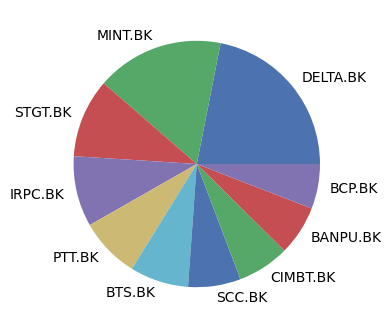

In [ ]:
fig = pd.Series(weights).sort_values(ascending=False).plot.pie(figsize=(4,4));

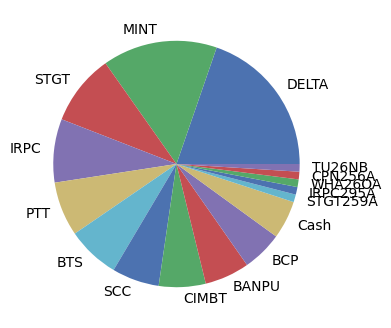

In [ ]:
# Adjust additional weight with ESG bonds + Cash
pd.Series(post_weight).sort_values(ascending=False).plot.pie(figsize=(4,4));

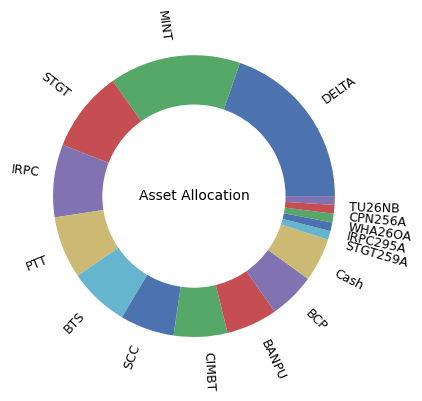

In [ ]:
#===== Adjust Donut Chart =====#
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-deep')

# Assuming 'weights' is your pandas Series
fig, ax = plt.subplots(figsize=(4, 4))

# Sort the Series in descending order
sorted_weights = pd.Series(post_weight).sort_values(ascending=False)

# Add explode
# num_cash_bond = 6
# explode = [0.0 for symbol in sorted_weights.to_list()]
# explode[-num_cash_bond:] = [0.1 for i in range(num_cash_bond)]
# explode

# Plot a pie chart
ax.pie(sorted_weights, labels=sorted_weights.index, startangle=0, textprops={'fontsize': 9}, rotatelabels=True)

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.65,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add text in the center
center_text = ax.text(0, 0, 'Asset Allocation', ha='center', va='center', fontsize=10, color='black')

# Equal aspect ratio ensures that the pie is drawn as a circle
ax.axis('equal')

plt.show()

## Back Testing - Port Alloc. with ESG
- buy and hold vs SET benchmark

In [ ]:
# ESG Portfolio Breakdown
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(stock_post_weight, prices.iloc[0], total_portfolio_value=initial_capital * (pct_esg_stock/100.0))  # Initial capital
alloc, leftover = da.lp_portfolio(verbose=True)
print(f"Leftover: ${leftover:.2f}")
alloc

Funds remaining: 6.96
MINT.BK: allocated 0.154, desired 0.151
DELTA.BK: allocated 0.218, desired 0.197
SCC.BK: allocated 0.124, desired 0.062
CIMBT.BK: allocated 0.062, desired 0.061
BANPU.BK: allocated 0.057, desired 0.059
STGT.BK: allocated 0.104, desired 0.093
BTS.BK: allocated 0.070, desired 0.069
PTT.BK: allocated 0.072, desired 0.071
IRPC.BK: allocated 0.084, desired 0.083
BCP.BK: allocated 0.056, desired 0.053
Allocation has RMSE: 0.021
Leftover: $6.96


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'MINT.BK': 14,
 'DELTA.BK': 9,
 'SCC.BK': 1,
 'CIMBT.BK': 205,
 'BANPU.BK': 13,
 'STGT.BK': 29,
 'BTS.BK': 24,
 'PTT.BK': 6,
 'IRPC.BK': 76,
 'BCP.BK': 5}

In [ ]:
def alloc_to_value(alloc, prices_for_date):
  asset_values = []

  for asset, allocation in alloc.items():
    if allocation > 0:
      asset_price = prices_for_date[asset]
      asset_value = allocation * asset_price
      asset_values.append(asset_value)

  return asset_values

return yield 6.957


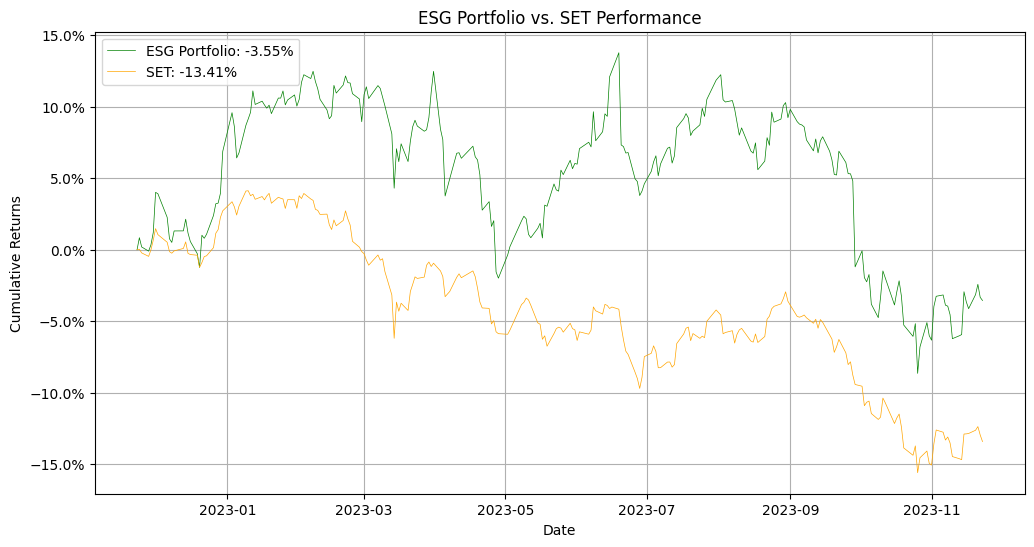

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
# plt.style.use('seaborn')


# Add Cash + Top5 ESG bonds to performance 1YR (return yield at redeem/withdraw)
initial_cap = initial_capital * (pct_esg_bond_cash/100.0)
ret_bond = (initial_cap/2) * (selected_esg_bond_df['Coupon (%)'].mean()/100.0)
ret_cash = (initial_cap/2) * (0.015)
ret_bond_cash = ret_bond + ret_cash
print('return yield', ret_bond_cash)


# Calculate portfolio value over time
portfolio_value = np.zeros(len(prices))
for i, date in enumerate(prices.index):
  asset_values = alloc_to_value(alloc, prices.loc[date])
  portfolio_value[i] = sum(asset_values) + leftover   # esg stocks
  portfolio_value[i]+= initial_cap                    # Add esg bond + esg cash

# Add esg bond + esg cash (return yield at redeem/withdraw)
portfolio_value[i]+= ret_bond_cash


# Calculate daily returns
daily_returns = portfolio_value / portfolio_value[0] - 1

# Calculate daily returns for the benchmark (SET.BK)
benchmark_daily_returns = market_prices / market_prices.iloc[0] - 1


# Create a DataFrame with portfolio performance
# portfolio_performance = pd.DataFrame({'Date': prices.index, 'Portfolio Value': portfolio_value, 'Daily Returns': daily_returns})
# portfolio_performance.set_index('Date', inplace=True)

# Create a DataFrame with portfolio and benchmark performance
performance_data = pd.DataFrame({
  'Date': prices.index,
  'Portfolio Returns': daily_returns * 100,
  'Benchmark Returns': benchmark_daily_returns * 100
})
performance_data.set_index('Date', inplace=True)


# Plot portfolio performance
plt.figure(figsize=(12, 6))
plt.plot(performance_data.index, performance_data['Portfolio Returns'], label=f"ESG Portfolio: {performance_data['Portfolio Returns'][-1]:.2f}%", color='green', linewidth=.5)
plt.plot(performance_data.index, performance_data['Benchmark Returns'], label=f"SET: {performance_data['Benchmark Returns'][-1]:.2f}%", color='orange', linewidth=.5)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('ESG Portfolio vs. SET Performance')
plt.grid(True)
plt.legend(loc='upper left')

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [ ]:
# Adjust weight to add ESG bonds + Cash
post_weight = {symbol.replace('.BK', ''): weight * (pct_esg_stock/100.0) for symbol, weight in weights.items()}
print(post_weight)

# ESG Portfolio Breakdown
stock_weight_df = pd.DataFrame(post_weight.items(), columns=['Symbol', 'Weight (%)']).sort_values(by='Weight (%)', ascending=False).reset_index(drop=True)
stock_weight_df = stock_weight_df.merge(esg_score_df[['Symbol', 'Refinitiv ESG']], on='Symbol', how='left')
stock_weight_df = stock_weight_df.rename(columns={'Refinitiv ESG': 'ESG Score'})
stock_weight_df

{'MINT': 0.150615, 'DELTA': 0.1971, 'SCC': 0.062063999999999994, 'CIMBT': 0.061434, 'BANPU': 0.058779000000000005, 'STGT': 0.093195, 'BTS': 0.069228, 'PTT': 0.071334, 'IRPC': 0.08334, 'BCP': 0.052911}


,Symbol,Weight (%),ESG Score
0,DELTA,0.197100,87.93
1,MINT,0.150615,91.31
2,STGT,0.093195,82.23
3,IRPC,0.083340,81.01
4,PTT,0.071334,81.70
5,BTS,0.069228,81.64
6,SCC,0.062064,83.28
7,CIMBT,0.061434,82.50
8,BANPU,0.058779,82.54
9,BCP,0.052911,80.37


In [ ]:
# ESG Portfolio Breakdown
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(
  weights, prices.iloc[-1],
  initial_capital * (pct_esg_stock/100.0)
)  # Initial capital
alloc, leftover = da.lp_portfolio(verbose=True)
print(f"Leftover: ${leftover:.2f}")
alloc

Funds remaining: 0.18
MINT.BK: allocated 0.166, desired 0.167
DELTA.BK: allocated 0.208, desired 0.224
SCC.BK: allocated 0.109, desired 0.065
CIMBT.BK: allocated 0.046, desired 0.050
BANPU.BK: allocated 0.076, desired 0.077
STGT.BK: allocated 0.077, desired 0.081
BTS.BK: allocated 0.067, desired 0.072
PTT.BK: allocated 0.076, desired 0.078
IRPC.BK: allocated 0.093, desired 0.102
BCP.BK: allocated 0.082, desired 0.083
Allocation has RMSE: 0.015
Leftover: $0.18


{'MINT.BK': 16,
 'DELTA.BK': 7,
 'SCC.BK': 1,
 'CIMBT.BK': 205,
 'BANPU.BK': 26,
 'STGT.BK': 32,
 'BTS.BK': 25,
 'PTT.BK': 6,
 'IRPC.BK': 123,
 'BCP.BK': 5}

## TV Result Validation

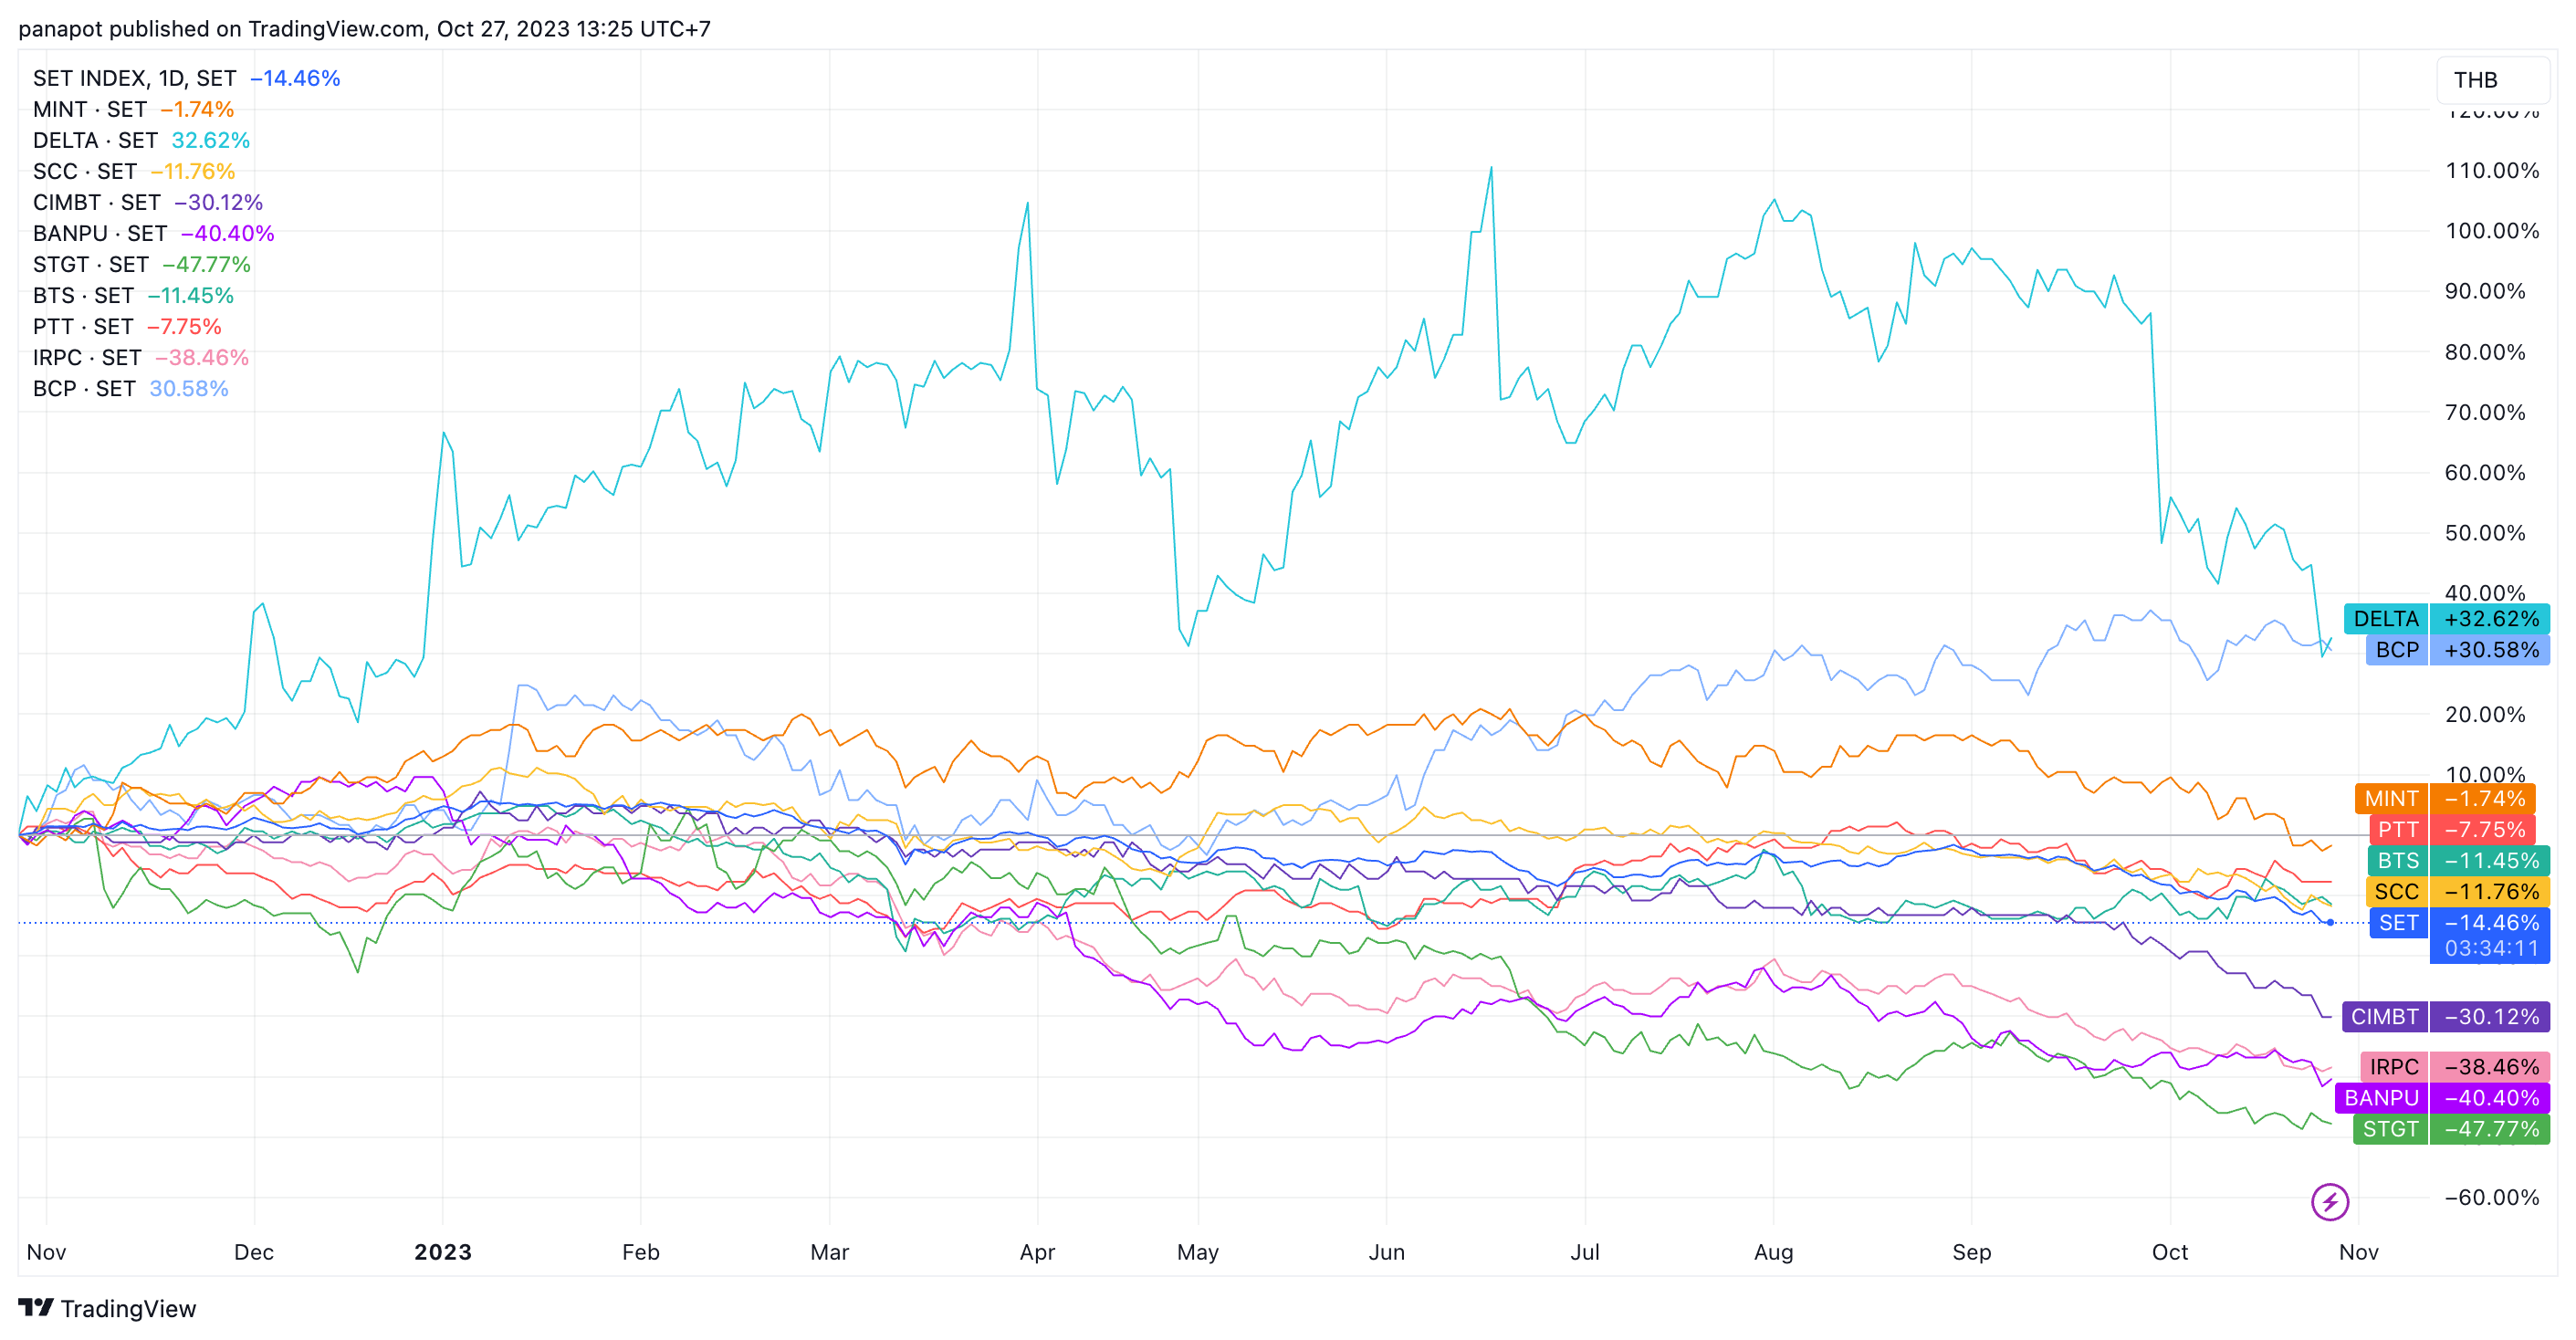